In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time

In [2]:
data= pd.read_csv('data.csv')

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
dummy = ['diagnosis']

In [8]:
final = pd.get_dummies(data,columns=dummy,drop_first=True)

In [9]:
final.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN,1
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN,1
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN,1
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN,1
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN,1


In [10]:
final.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
diagnosi

In [11]:
final.drop(['Unnamed: 32'],axis=1,inplace=True)
final.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [12]:
final.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_M                0
dtype: int64

In [13]:
final.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


In [14]:
z = final.drop('id',axis=1)

In [15]:
y = final.diagnosis_M

Text(0.5, 0, 'radius_mean')

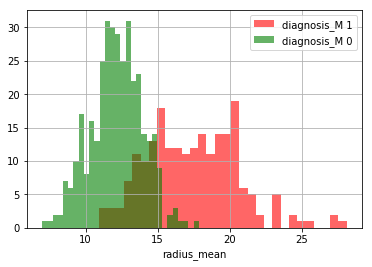

In [16]:
final[final['diagnosis_M']==1]['radius_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['radius_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("radius_mean")




Text(0.5, 0, 'texture_mean')

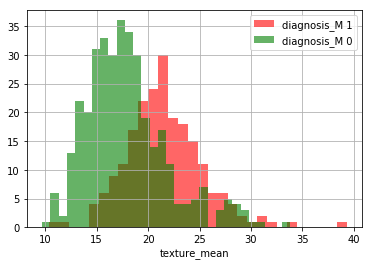

In [17]:
final[final['diagnosis_M']==1]['texture_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['texture_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("texture_mean")


Text(0.5, 0, 'perimeter_mean')

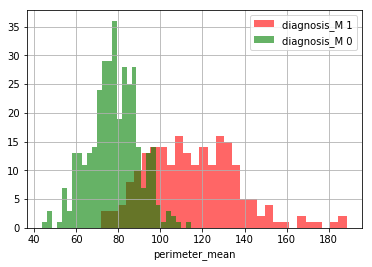

In [18]:
final[final['diagnosis_M']==1]['perimeter_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['perimeter_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("perimeter_mean")

Text(0.5, 0, 'area_mean')

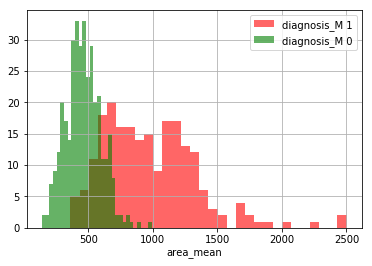

In [19]:
final[final['diagnosis_M']==1]['area_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['area_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("area_mean")

Text(0.5, 0, 'smoothness_mean')

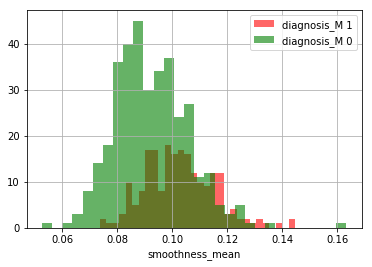

In [20]:
final[final['diagnosis_M']==1]['smoothness_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['smoothness_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("smoothness_mean")

Text(0.5, 0, 'compactness_mean')

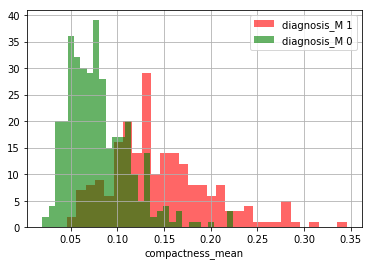

In [21]:
final[final['diagnosis_M']==1]['compactness_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['compactness_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("compactness_mean")

Text(0.5, 0, 'concavity_mean')

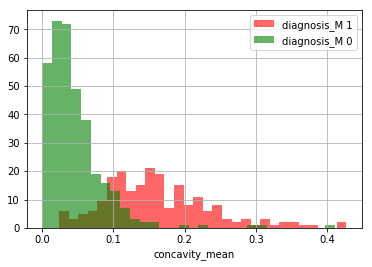

In [22]:
final[final['diagnosis_M']==1]['concavity_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['concavity_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("concavity_mean")

Text(0.5, 0, 'concave points_mean')

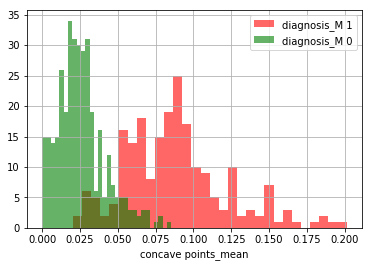

In [23]:
final[final['diagnosis_M']==1]['concave points_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['concave points_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("concave points_mean")


Text(0.5, 0, 'symmetry_mean')

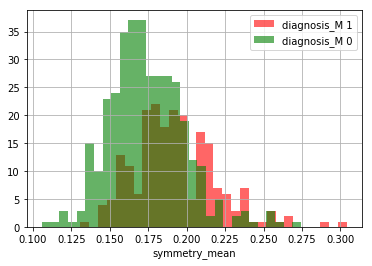

In [24]:
final[final['diagnosis_M']==1]['symmetry_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['symmetry_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("symmetry_mean")

Text(0.5, 0, 'fractal_dimension_mean')

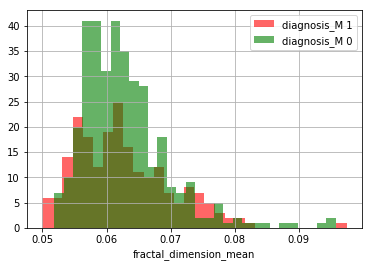

In [25]:
final[final['diagnosis_M']==1]['fractal_dimension_mean'].hist(bins=30,color='red',label='diagnosis_M 1',alpha=0.6)
final[final['diagnosis_M']==0]['fractal_dimension_mean'].hist(bins=30,color='green',label='diagnosis_M 0',alpha=0.6)

plt.legend()
plt.xlabel("fractal_dimension_mean")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

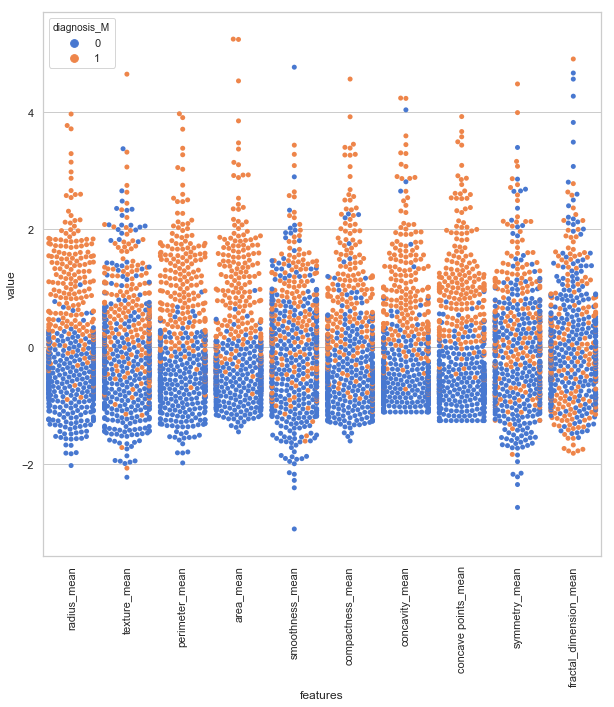

In [26]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = z
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis_M",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis_M", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

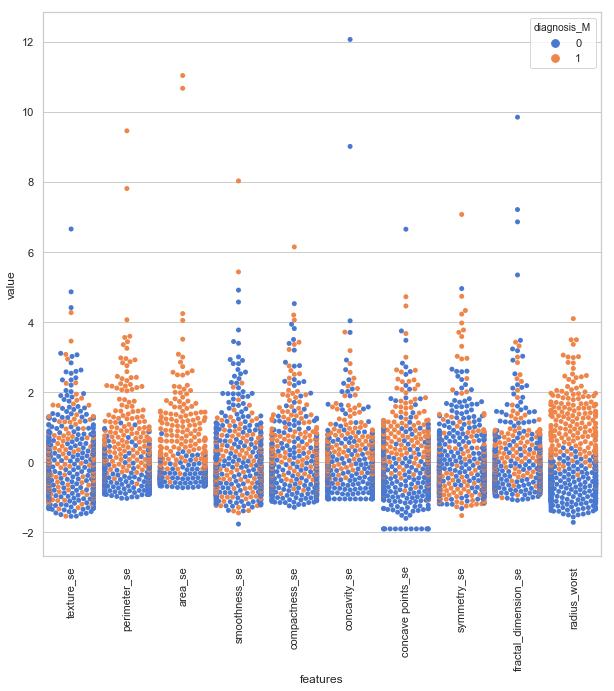

In [27]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = z
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,11:21]],axis=1)
data = pd.melt(data,id_vars="diagnosis_M",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis_M", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

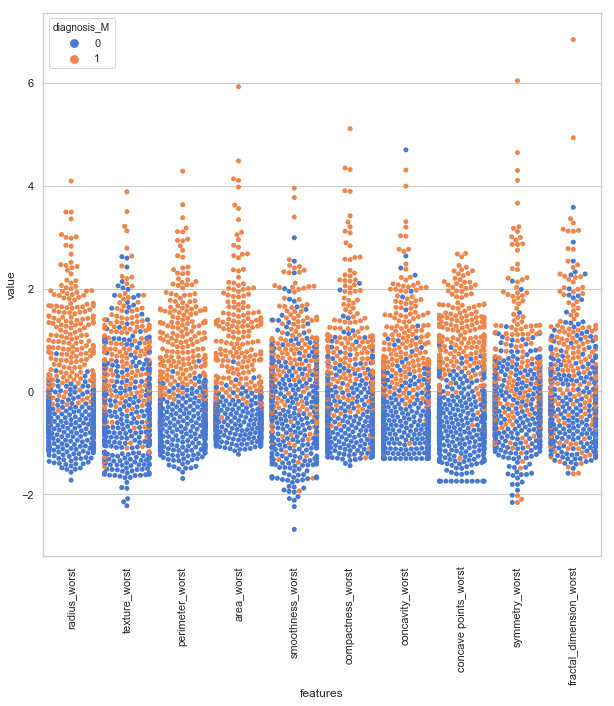

In [29]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = final
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,21:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis_M",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis_M", data=data)

plt.xticks(rotation=90)

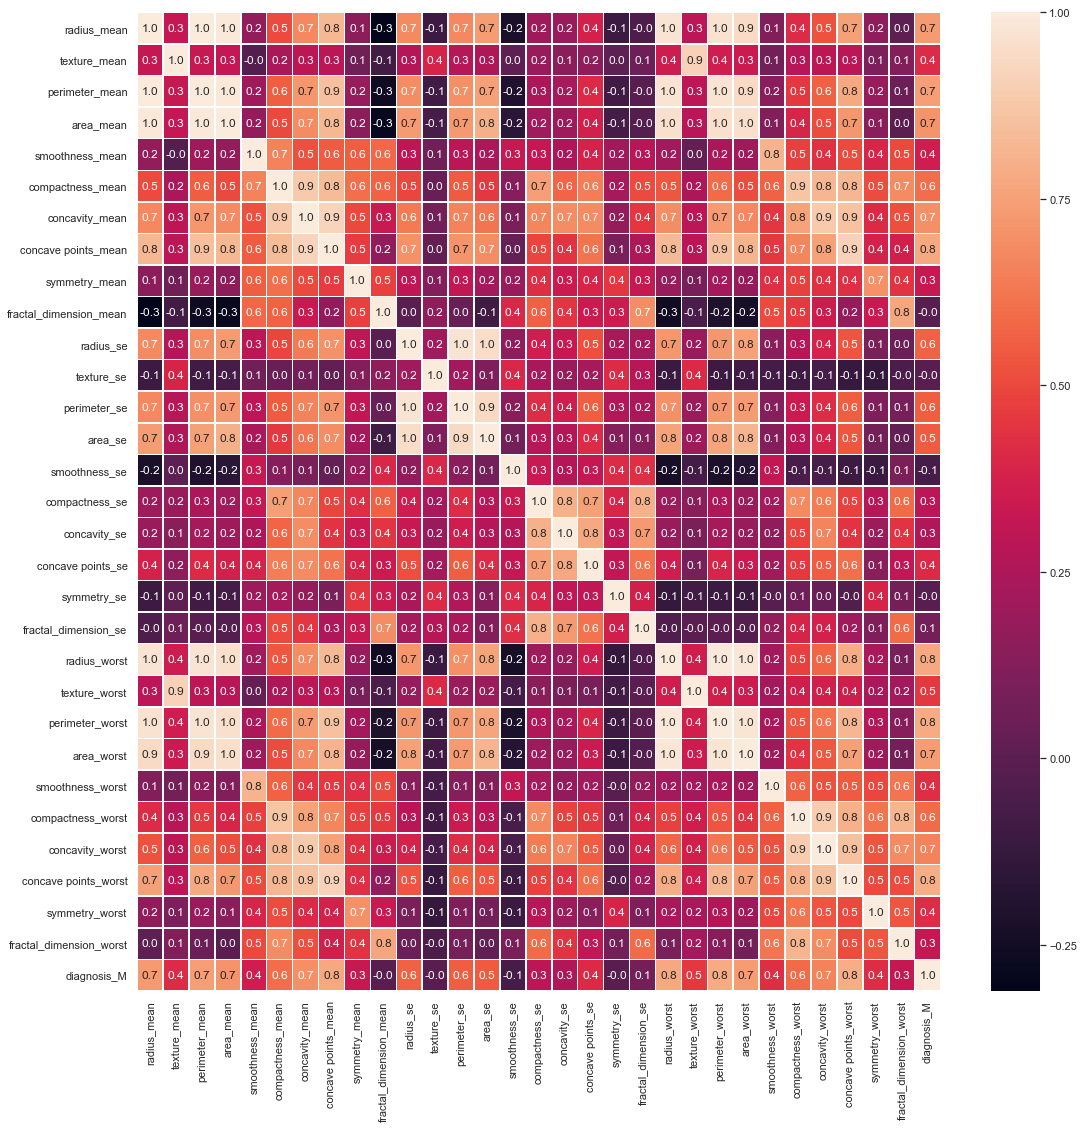

In [30]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(z.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [31]:
z.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [109]:
drop_list = ['texture_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean',
            'radius_se', 'texture_se','area_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'symmetry_se','fractal_dimension_se','texture_worst','smoothness_worst','compactness_worst','symmetry_worst', 'fractal_dimension_worst']
r = z.drop(drop_list,axis=1)

In [110]:
r.head()

,radius_mean,perimeter_mean,area_mean,concave points_mean,perimeter_se,concavity_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis_M
0,17.99,122.80,1001.0,0.14710,8.589,0.05373,25.38,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07017,3.398,0.01860,24.99,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.12790,4.585,0.03832,23.57,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.10520,3.445,0.05661,14.91,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.10430,5.438,0.05688,22.54,152.20,1575.0,0.4000,0.1625,1


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [166]:
    X=r.drop('diagnosis_M',axis=1)
    y=r['diagnosis_M']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [167]:
model = RandomForestClassifier(n_estimators=300)

In [168]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
pred = model.predict(X_test)

In [170]:
print(confusion_matrix(y_test,pred))

[[109   3]
 [  2  57]]


In [171]:
print(accuracy_score(y_test,pred))

0.9707602339181286


In [172]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

